# Assignment 5
Simulate 1000 battle rounds in Risk.

Undertaken for the [Programming for Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics#:~:text=Programming%20for%20Data%20Analytics) module as part of the [Higher Diploma in Science in Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics) at ATU.

In [285]:
import numpy as np # to utilise random number generation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

sns.set()

I will attempt to write a function that simulates a single round of Risk: I

In [286]:
# simulate a single round of Risk
def risk_round():
    # no losses at start of round
    defend_loss = 0
    attack_loss = 0
   
    # attacker and defender choose number of troops to put forward
    attack_dice = np.random.randint(1, 4)
    defend_dice = np.random.randint(1, 3)

    # simulating dice rolls for the chosen number of troops
    attack_rolls = [np.random.randint(1, 7) for _ in range(attack_dice)]
    defend_rolls = [np.random.randint(1, 7) for _ in range(defend_dice)]

    # sorting attack and defence in descending order
    sorted_attack = sorted(attack_rolls, reverse=True)
    sorted_defend = sorted(defend_rolls, reverse=True)

    # comparing max attack and max defence dice
    max_attack = max(sorted_attack)
    max_defend = max(sorted_defend)

    if max_attack > max_defend:
        defend_loss += 1 # if the max attack roll is greater than max defend, one defend loss
    else:
        attack_loss += 1 # if max attack is equal or less, one attack loss

    # handling if only one dice by either player
    if len(sorted_attack) >1 and len(sorted_defend) >1:
        two_attack = sorted_attack[1]
        two_defend = sorted_defend[1]
       
       # comparing 2nd attack and 2nd defence dice
        if two_attack > two_defend:
            defend_loss += 1 # if the 2nd attack roll is greater than 2nd defend, one defend loss
        else:
            attack_loss += 1 # if 2nd attack is equal or less, one attack loss

    else:
        two_attack = "n/a"
        two_defend = "n/a"

    #return attack and defend loss for this round
    return attack_loss, defend_loss

In [287]:
risk_round()

(1, 0)

In [288]:
# tracking losses over time to create plot
round = []
attack_losses = []
defend_losses = []

# tracking cumulative
attack_loss_total = 0
defend_loss_total = 0

for rounds in range(1000):
    attack_loss, defend_loss = risk_round()
    attack_loss_total += attack_loss
    defend_loss_total += defend_loss
    round.append(rounds)
    attack_losses.append(attack_loss_total)
    defend_losses.append(defend_loss_total)

print(attack_losses)
print(defend_losses)

print(attack_loss_total)
print(defend_loss_total)

[2, 2, 4, 5, 7, 7, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23, 23, 24, 25, 26, 26, 28, 29, 30, 30, 30, 31, 32, 34, 35, 35, 35, 35, 35, 36, 38, 38, 39, 40, 40, 41, 43, 43, 45, 45, 45, 46, 48, 49, 50, 52, 52, 54, 54, 54, 55, 55, 56, 56, 56, 57, 57, 59, 60, 60, 60, 62, 64, 64, 65, 66, 67, 69, 69, 69, 69, 71, 71, 72, 73, 73, 73, 75, 76, 78, 79, 79, 80, 81, 82, 82, 83, 84, 84, 86, 88, 89, 89, 89, 90, 90, 90, 92, 92, 93, 94, 95, 95, 97, 97, 98, 98, 99, 99, 100, 102, 102, 102, 103, 104, 106, 107, 107, 107, 107, 108, 108, 108, 108, 109, 109, 109, 111, 111, 112, 112, 113, 113, 113, 113, 113, 113, 113, 114, 114, 115, 115, 115, 115, 117, 117, 117, 117, 119, 119, 119, 120, 121, 122, 122, 122, 124, 125, 126, 126, 126, 126, 127, 128, 129, 131, 132, 133, 133, 134, 134, 134, 135, 135, 136, 136, 136, 136, 137, 139, 140, 141, 141, 141, 143, 143, 143, 144, 144, 145, 146, 147, 148, 148, 148, 148, 148, 148, 148, 150, 151, 151, 152, 152, 152, 152, 152, 152, 152, 153, 153, 155, 15

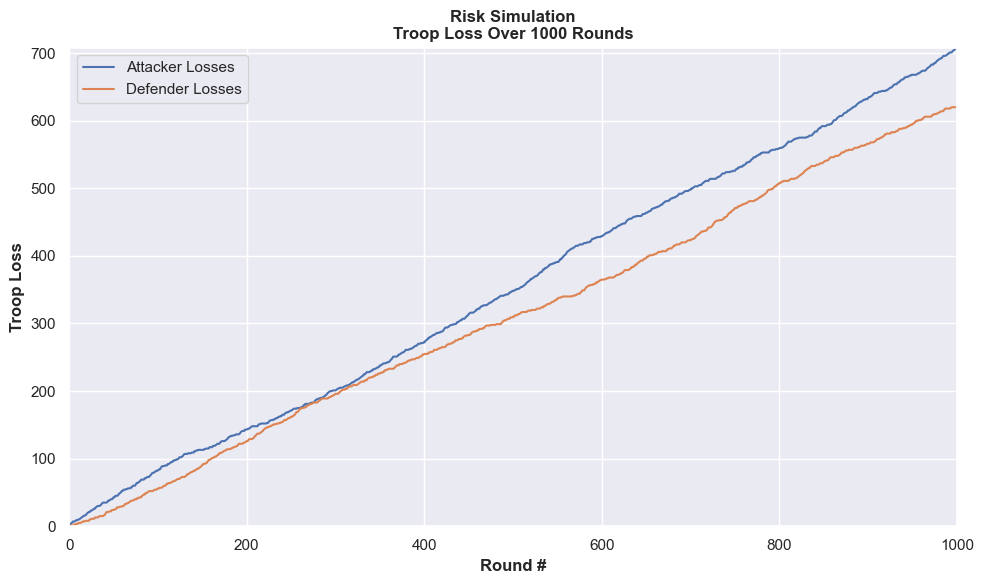

In [303]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plotting both attack and defend loss over rounds
plt.plot(round, attack_losses, label="Attacker Losses")
plt.plot(round, defend_losses, label="Defender Losses")

# Adding labels and title
plt.xlabel("Round #", weight='bold')
plt.ylabel("Troop Loss", weight='bold')
plt.title("Risk Simulation\nTroop Loss Over 1000 Rounds", weight='bold')
plt.legend()

plt.xlim(0, 1000)
plt.ylim(0, max(max(attack_losses), max(defend_losses)) + 1)  # Set y-axis to go from 0 to the max loss plus 1

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()